In [4]:
from base_m_noise import *
import base_m_noise; importlib.reload(base_m_noise)

<module 'base_m_noise' from '/Users/tphillips/multiplicative_noise/python/base_m_noise.py'>

In [ ]:
@jit(nopython=True)
def f_lin(X, om, lam=0):
    """Drift function"""
    return(om + lam*X)

@jit(nopython=True)
def g_lin(X, D, m=None):
    """Diffusion function"""
    return(D * X)

def beta_lin(D, om, sig):
    """Scale parameter function"""
    pow = sig/(sig+D)
    upp = (sig + D)**(2-pow) 
    low = D**(1-pow)
    return((upp/(om*low))**(-1))

def max_lin(D, om, sig):
    """Maximum obtained analytically from solution of FPE"""
    return(om/(2*D - sig))

def m_mom(om, D, D2, T, dt, sig, vp=[0.5,0.4], plot=True, lim=10):
    """Obtain a list FWHM values for different parameters"""

    varl, fwhm, max_l = [], [], []
    klist = np.zeros(40)
    
    for i in range(1,30):
        clear_output(wait=True)
        var_ = vp[0] + vp[1]*i
        print("D1 =", D, "sig =", sig, "var =", var_)

        if om=='var':
            j = f_lin(0.1, var_, sig)
            h = g_lin(0.1, D)
            print(h, j)

            x_per, P_per = stat_den_sde(var_, D, D2, T, f_lin, g_lin, 
                                dt, osc=False, lim=lim, n=sig)
        elif D=='var':
            x_per, P_per = stat_den_sde(om, var_, D2, T, f_lin, g_lin, 
                                dt, osc=False, lim=lim, n=sig)
            
        varl.append(var_)
        lower_x, upper_x = half_max_x(x_per, P_per)

        if klist[i-1] == 1: 
            fwhm.append(np.pi - (upper_x - lower_x))
        else:
            fwhm.append(upper_x - lower_x)

        xmax = find_max(x_per, P_per) 
        max_l.append(xmax)

        if plot:
            f, ax = plt.subplots(1, 1, figsize=(4, 2))
            ax.plot(x_per, P_per, 'k-')
            ax.axvline(lower_x, color='grey'); ax.axvline(upper_x, color='grey')
            ax.axvline(xmax, color='r')

    return(varl, fwhm, max_l)

### Maximum and Full Width Half Maximum (FWHM) of the stationary probability distribution

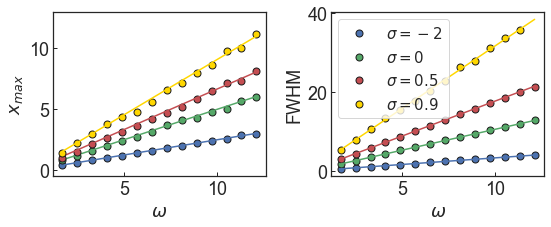

In [ ]:
D, D2, T, dt, sig = 1, 0, 400000, 0.005, -2

oml, fwhm_sm2, max_sm2 = m_mom('var', D, D2, T, dt, sig, plot=False, lim=20)
max_an_sm2  = np.array([max_lin(D, x, sig) for x in oml])
beta_an_sm2 = np.array([beta_lin(D, x, sig) for x in oml])

sig = 0

oml, fwhm_s0, max_s0 = m_mom('var', D, D2, 2*T, dt, sig, plot=False, lim=30)
max_an_s0  = np.array([max_lin(D, x, sig) for x in oml])
beta_an_s0 = np.array([beta_lin(D, x, sig) for x in oml])

sig = 0.5

oml, fwhm_s05, max_s05 = m_mom('var', D, D2, 2*T, dt, sig, plot=False, lim=50)
max_an_s05  = np.array([max_lin(D, x, sig) for x in oml])
beta_an_s05 = np.array([beta_lin(D, x, sig) for x in oml])

sig = 0.9

oml, fwhm_s09, max_s09 = m_mom('var', D, D2, T, dt, sig, plot=False, lim=60)
max_an_s09  = np.array([max_lin(D, x, sig) for x in oml])
beta_an_s09 = np.array([beta_lin(D, x, sig) for x in oml])

s = 0.9
params = {'xtick.labelsize': s*20, 'ytick.labelsize': s*20,
              'axes.labelsize': s*20, 'axes.titlesize': s*20,  
              'font.size': s*20, 'legend.handlelength': 2}

sns.set_theme(style="white", rc=params)

f, (ax, ax2) = plt.subplots(1, 2, figsize=(8, 3.5), sharex=True)

s, gap = 2, 2

ax.plot(oml[s::gap], max_sm2[s::gap], 'bo', markersize=7, mec = 'k', label='Lin. (Num.)')
ax.plot(oml[s::gap], max_an_sm2[s::gap], 'b-', label='Lin. (An.)')
ax.plot(oml[s::gap], max_s0[s::gap], 'go', markersize=7, mec = 'k', label='Lin. (Num.)')
ax.plot(oml[s::gap], max_an_s0[s::gap], 'g-', label='Lin. (An.)')
ax.plot(oml[s::gap], max_s05[s::gap], 'ro', markersize=7, mec = 'k', label='Lin. (Num.)')
ax.plot(oml[s::gap], max_an_s05[s::gap], 'r-', label='Lin. (An.)')
ax.plot(oml[s::gap], max_s09[s::gap], 'o', color='gold', markersize=7, mec = 'k', label='Lin. (Num.)')
ax.plot(oml[s::gap], max_an_s09[s::gap], '-', color='gold', label='Lin. (An.)')

ax.set_xlabel(r'$\omega$')
ax.set_ylim([-0.5, 13])
ax.set_ylabel(r'$x_{max}$')
ax.tick_params(bottom=True, left=True)
ax.tick_params(direction="in", length=4, width=1, grid_alpha=0.5)

ax2.plot(oml[s::2], fwhm_sm2[s::2], 'bo', markersize=7, mec = 'k', label=r'$\sigma = - 2$')
ax2.plot(oml[s::2], fwhm_s0[s::2], 'go', markersize=7, mec = 'k', label=r'$\sigma = 0$')
ax2.plot(oml[s::2], fwhm_s05[s::2], 'ro', markersize=7, mec = 'k', label=r'$\sigma = 0.5$')
ax2.plot(oml[s:-1:2], fwhm_s09[s:-1:2], 'o', color='gold', markersize=7, mec = 'k', label=r'$\sigma = 0.9$')

corr = 1

ax2.plot(oml[s:], (fwhm_sm2[4]/beta_an_sm2[4])*beta_an_sm2[s:], 'b-') 
ax2.plot(oml[s:], (fwhm_s0[4]/beta_an_s0[4])*beta_an_s0[s:], 'g-') 
ax2.plot(oml[s:], (fwhm_s05[4]/beta_an_s05[4])*beta_an_s05[s:], 'r-') 
ax2.plot(oml[s:], (fwhm_s09[4]/beta_an_s09[4])*beta_an_s09[s:], '-', color='gold') 

ax2.set_xlabel(r'$\omega$')
ax2.set_ylabel(r'FWHM')
ax2.tick_params(bottom=True, left=True)
ax2.tick_params(direction="in", length=4, width=1, grid_alpha=0.5)

ax2.legend(fontsize=15)

f.tight_layout()

f.savefig('/max_fwhm_D1_T400000_dtp005_lin_sig_omega.png', bbox_inches='tight', format='png', dpi=160)

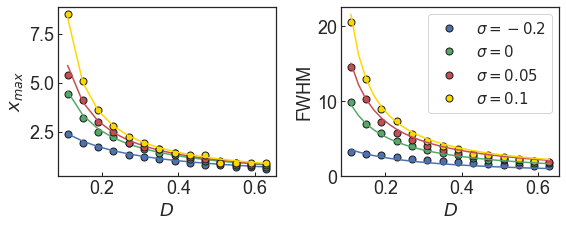

In [ ]:
om, D2, T, dt, sig = 1, 0, 100000, 0.005, -0.2

Dl, fwhm_sm2d, max_sm2d = m_mom(om, 'var', D2, T, dt, sig, vp=[0.05,0.02], plot=False, lim=30)
max_an_sm2d  = np.array([max_gen(x, om, sig) for x in Dl])
beta_an_sm2d = np.array([beta_lin(D, x, sig) for x in Dl])
beta_an_sm2d = np.array([max_gen(x, om, sig) for x in Dl])

sig = 0

Dl, fwhm_s0d, max_s0d = m_mom(om, 'var', D2, T, dt, sig, vp=[0.05,0.02], plot=False, lim=30)
max_an_s0d  = np.array([max_gen(x, om, sig) for x in Dl])
beta_an_s0d = np.array([beta_lin(D, x, sig) for x in Dl])
beta_an_s0d = np.array([max_gen(x, om, sig) for x in Dl])

sig = 0.05

Dl, fwhm_s05d, max_s05d = m_mom(om, 'var', D2, T, 0.2*dt, sig, vp=[0.05,0.02], plot=False, lim=30)
max_an_s05d  = np.array([max_gen(x, om, sig) for x in Dl])
beta_an_s05d = np.array([beta_lin(D, x, sig) for x in Dl])
beta_an_s05d = np.array([max_gen(x, om, sig) for x in Dl])

sig = 0.1

Dl, fwhm_s1d, max_s1d = m_mom(om, 'var', D2, 0.1*T, 0.03*dt, sig, vp=[0.05,0.02], plot=False, lim=30)
max_an_s1d  = np.array([max_gen(x, om, sig) for x in Dl])
beta_an_s1d = np.array([beta_lin(D, x, sig) for x in Dl])
beta_an_s1d = np.array([max_gen(x, om, sig) for x in Dl])

s = 0.9
params = {'xtick.labelsize': s*20, 'ytick.labelsize': s*20,
              'axes.labelsize': s*20, 'axes.titlesize': s*20,  
              'font.size': s*20, 'legend.handlelength': 2}

sns.set_theme(style="white", rc=params)

f, (ax, ax2) = plt.subplots(1, 2, figsize=(8, 3.5), sharex=True)

s, gap = 2, 2

#fwhm_s1d[2] = 20.5 #30 - fwhm_s1da[2]

ax.plot(Dl[s::gap], max_sm2d[s::gap], 'bo', markersize=7, mec = 'k', label='Lin. (Num.)')
ax.plot(Dl[s::gap], max_an_sm2d[s::gap], 'b-', label='Lin. (An.)')
ax.plot(Dl[s::gap], max_s0d[s::gap], 'go', markersize=7, mec = 'k', label='Lin. (Num.)')
ax.plot(Dl[s::gap], max_an_s0d[s::gap], 'g-', label='Lin. (An.)')
ax.plot(Dl[s::gap], max_s05d[s::gap], 'ro', markersize=7, mec = 'k', label='Lin. (Num.)')
ax.plot(Dl[s::gap], max_an_s05d[s::gap], 'r-', label='Lin. (An.)')
ax.plot(Dl[s::gap], max_s1d[s::gap], 'o', color='gold', markersize=7, mec = 'k', label='Lin. (Num.)')
ax.plot(Dl[s::gap], max_an_s1d[s::gap], '-', color='gold', label='Lin. (An.)')

ax.set_xlabel(r'$D$')
#ax.set_ylim([-0.5, 13])
ax.set_ylabel(r'$x_{max}$')
ax.tick_params(bottom=True, left=True)
ax.tick_params(direction="in", length=4, width=1, grid_alpha=0.5)

ax2.plot(Dl[s::2], fwhm_sm2d[s::2], 'bo', markersize=7, mec = 'k', label=r'$\sigma = - 0.2$')
ax2.plot(Dl[s::2], fwhm_s0d[s::2], 'go', markersize=7, mec = 'k', label=r'$\sigma = 0$')
ax2.plot(Dl[s::2], fwhm_s05d[s::2], 'ro', markersize=7, mec = 'k', label=r'$\sigma = 0.05$')
ax2.plot(Dl[s:-1:2], fwhm_s1d[s:-1:2], 'o', color='gold', markersize=7, mec = 'k', label=r'$\sigma = 0.1$')

corr = 1

ax2.plot(Dl[s:], (fwhm_sm2d[4]/beta_an_sm2d[4])*beta_an_sm2d[s:], 'b-') 
ax2.plot(Dl[s:], (fwhm_s0d[4]/beta_an_s0d[4])*beta_an_s0d[s:], 'g-') 
ax2.plot(Dl[s:], (fwhm_s05d[4]/beta_an_s05d[4])*beta_an_s05d[s:], 'r-') 
ax2.plot(Dl[s:], (fwhm_s1d[4]/beta_an_s1d[4])*beta_an_s1d[s:], '-', color='gold') 

ax2.set_xlabel(r'$D$')
ax2.set_ylabel(r'FWHM')
ax2.tick_params(bottom=True, left=True)
ax2.tick_params(direction="in", length=4, width=1, grid_alpha=0.5)

ax2.legend(fontsize=15)

f.tight_layout()

f.savefig('/max_fwhm_om1_D2_0_D1small_T400000_dtp005_lin_sig_omega.png', bbox_inches='tight', format='png', dpi=160)